## Reading the Data

In [47]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\Administrator\Desktop\KAIM\Financial-News-and-Stock-Price-Integration\data\raw_analyst_ratings.csv")

# Display the first few rows
data.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [33]:
data['headline_length'] = data['headline'].astype(str).apply(len)

headline_stats = data['headline_length'].describe()
print(headline_stats)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


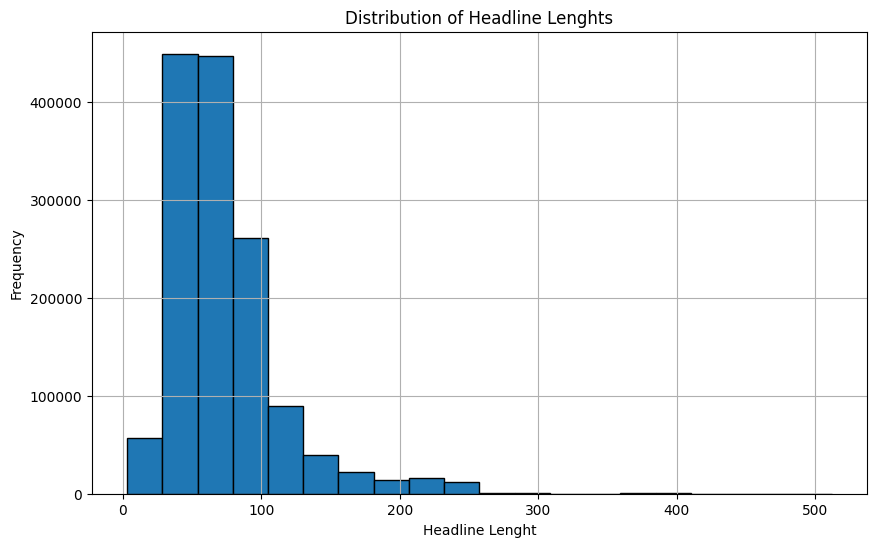

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data['headline_length'].hist(bins=20, edgecolor= 'black')
plt.title('Distribution of Headline Lenghts')
plt.xlabel('Headline Lenght')
plt.ylabel('Frequency')
plt.show()

## Publisher Analysis

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


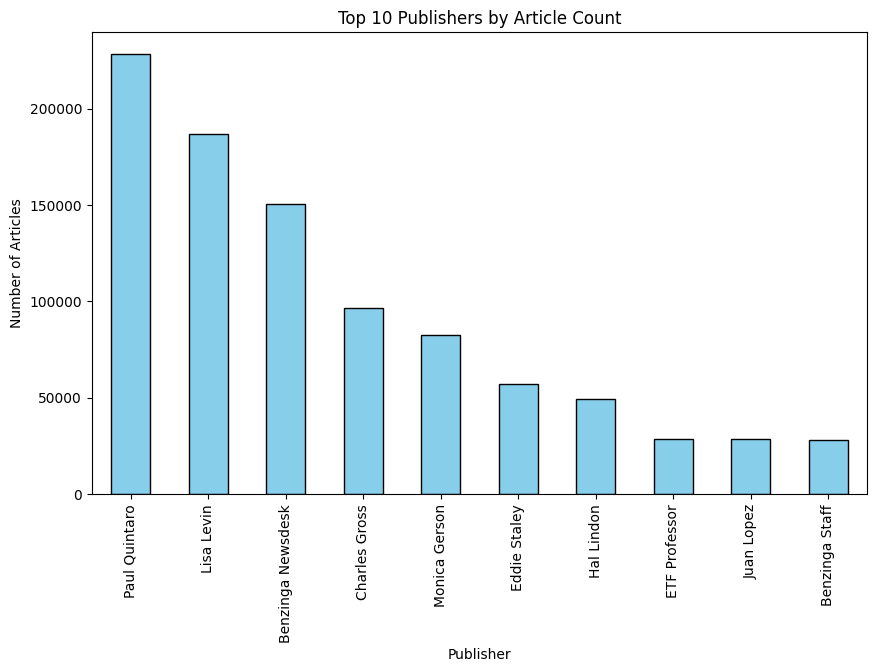

In [49]:
# Count articles per publisher
publisher_counts = data['publisher'].value_counts()

# Display the top publishers
print(publisher_counts.head(10))

# Bar plot for the top 10 publishers
publisher_counts.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()

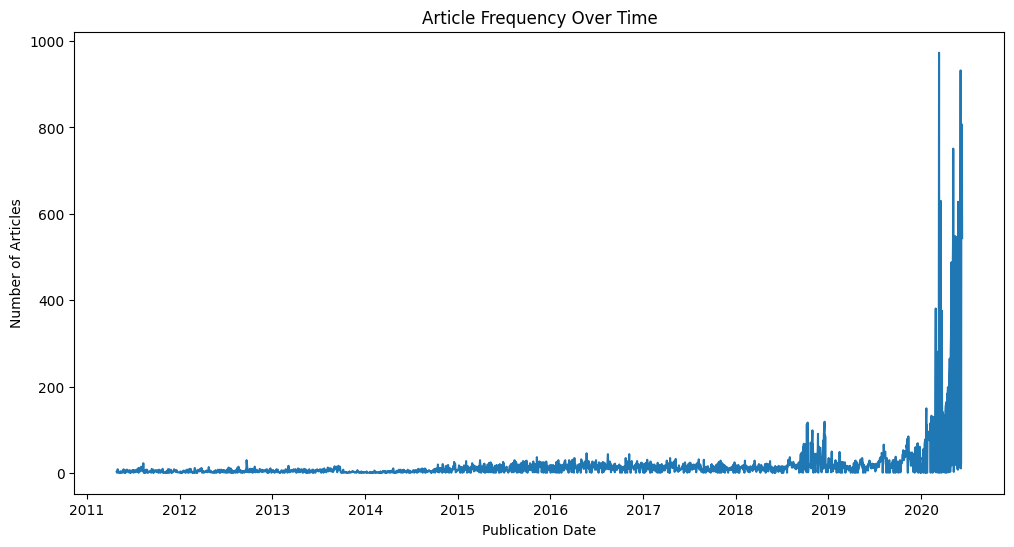

In [52]:
# Ensure the 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Analyze the frequency of articles over time
date_counts = data['date'].dt.date.value_counts().sort_index()

# Plot the trend over time
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
date_counts.plot()
plt.title('Article Frequency Over Time')
plt.xlabel('Publication Date')
plt.ylabel('Number of Articles')
plt.show()

In [66]:

    # Initialize VADER SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()
    
    # Apply sentiment analysis on the 'headline' column
    data['sentiment'] = data['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

    # Categorize the sentiment into positive, negative, or neutral
    data['sentiment_label'] = data['sentiment'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

    print("Sentiment analysis complete. Here are some samples:")
    print(data[['headline', 'sentiment', 'sentiment_label']].head())

Sentiment analysis complete. Here are some samples:
                                            headline  sentiment  \
0                 The stock market is booming today!     0.0000   
1             Major losses hit the financial sector.    -0.4019   
2  Investors are feeling neutral about the new po...     0.1280   
3         Great growth prospects for tech companies.     0.8360   
4                     A mixed bag for energy stocks.     0.2732   

  sentiment_label  
0         neutral  
1        negative  
2        positive  
3        positive  
4        positive  


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6052\1671951227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_data['date'] = pd.to_datetime(event_data['date'], errors='coerce')


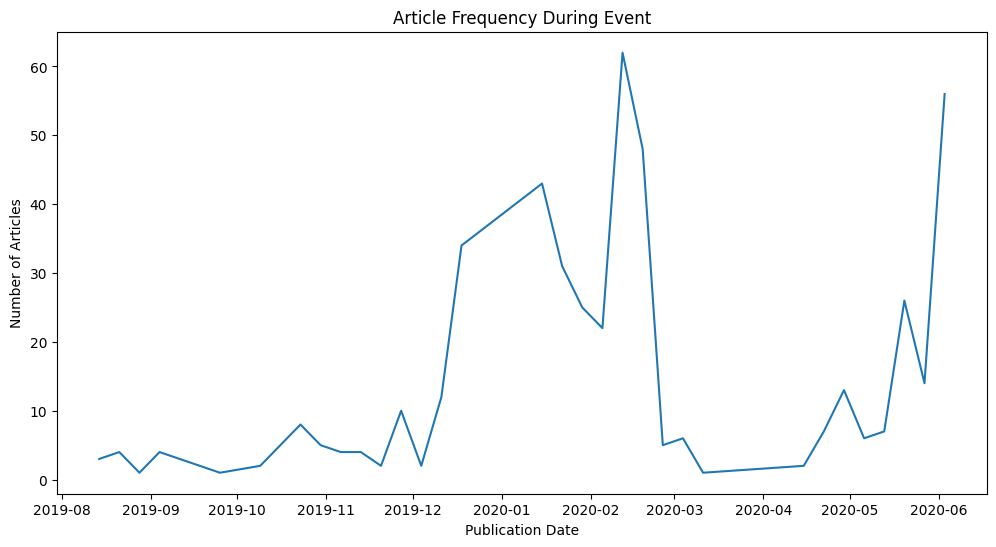

In [38]:
# Example: Filter for a specific event using keywords
event_data = data[data['headline'].str.contains('Stocks That Hit 52-Week Highs On Wednesday', na=False, case=False)]

# Ensure the 'date' column is in datetime format
event_data['date'] = pd.to_datetime(event_data['date'], errors='coerce')

# Analyze article frequency during the event
event_date_counts = event_data['date'].dt.date.value_counts().sort_index()

# Plot the trend during the event
plt.figure(figsize=(12, 6))
event_date_counts.plot()
plt.title('Article Frequency During Event')
plt.xlabel('Publication Date')
plt.ylabel('Number of Articles')
plt.show()